In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
dataFrame = pd.read_csv("/gdrive/MyDrive/Calisma_ortami/eksik_veriler.csv")

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [ ]:
Yas= dataFrame.iloc[:, 1:4].values

In [ ]:
imputer = imputer.fit(Yas[:, 1:4])
Yas[:, 1:4] = imputer.transform(Yas[:, 1:4])
yasDF= pd.DataFrame(Yas, columns= ["BOY", "KİLO", "YAS"])

In [ ]:
cinsiyet = dataFrame.iloc[:, 3:-1].values
from sklearn import preprocessing
labelEncoding = preprocessing.LabelEncoder()
cinsiyet[:, -1] = labelEncoding.fit_transform(dataFrame.iloc[:, -1])
cinsiyet

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [ ]:
ulke = dataFrame.iloc[:,0:1].values
oneHotEncoding =preprocessing.OneHotEncoder()
ulke= oneHotEncoding.fit_transform(ulke).toarray()
ulke

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
ulkeDF= pd.DataFrame(ulke, columns= ["TR","USA","FR"])
#ulkeDF= pd.DataFrame(data= ulke, index= range(22), columns= ["TR","USA","FR"])
ulkeDF

,TR,USA,FR
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


In [ ]:
sonucDF = pd.concat([ulkeDF, yasDF], axis=1)

In [ ]:
sonucDF["CINSIYET"] = cinsiyet

In [ ]:
sonucDF["BOOL_CINSIYET"]= dataFrame["cinsiyet"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= sonucDF.drop(["CINSIYET","BOOL_CINSIYET"], axis=1).values
y= sonucDF["CINSIYET"].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=0 )

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()

In [ ]:
x_train= scaler.fit_transform(x_train)

In [ ]:
x_test= scaler.fit_transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

<Figure size 700x500 with 0 Axes>

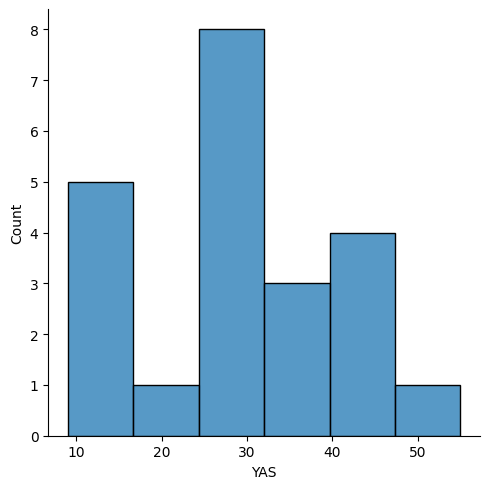

In [ ]:
plt.figure(figsize=[7,5])
sbn.displot(data=sonucDF["YAS"])